While `Seaborn` provides high-level functions and beautiful defaults, it's built on `Matplotlib`. This means you can almost always "drop down" to use `Matplotlib` functions for fine-grained customization of your `Seaborn` plots. This section demonstrates how to combine `Seaborn`'s ease of use with `Matplotlib`'s power.

## Seaborn: Customization & Integration with Matplotlib

This document covers:

* **Customizing Axes-level Plots:** How to create a plot using a `Seaborn` axes-level function (like `sns.boxplot`) on a `Matplotlib` `Axes` object, and then use standard `Matplotlib` methods (`ax.set_title`, `ax.set_xlabel`, `ax.tick_params`, `ax.axhline`, `ax.get_legend`, etc.) for detailed customization.
* **Saving Plots:** Reinforces using `fig.savefig()` (or `plt.savefig()`) to save the generated figure, ideally before `plt.show()`.
* **Customizing Figure-level Plots:** Shows how figure-level functions (like `sns.relplot`) return a grid object (e.g., `FacetGrid`). You can then access the underlying `Figure` (`g.fig`) and `Axes` (`g.axes`) from this object to apply `Matplotlib` customizations, or use methods directly on the grid object (`g.set_axis_labels`, `g.set_titles`, `g.savefig`).

---

This demonstrates the powerful synergy between `Seaborn`'s high-level statistical plotting and `Matplotlib`'s detailed customization capabilities.

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os # For saving plots

In [5]:
# Load the 'tips' dataset
tips = sns.load_dataset("tips")

# Set a Seaborn theme
sns.set_theme(style="whitegrid", palette="muted")

#### 1. Customizing Axes-level Plots
- Axes-level functions (e.g., scatterplot, boxplot, histplot) return the
- Matplotlib Axes object they were drawn onto.

--- Customizing Axes-level Plots ---


<Axes: xlabel='day', ylabel='total_bill'>

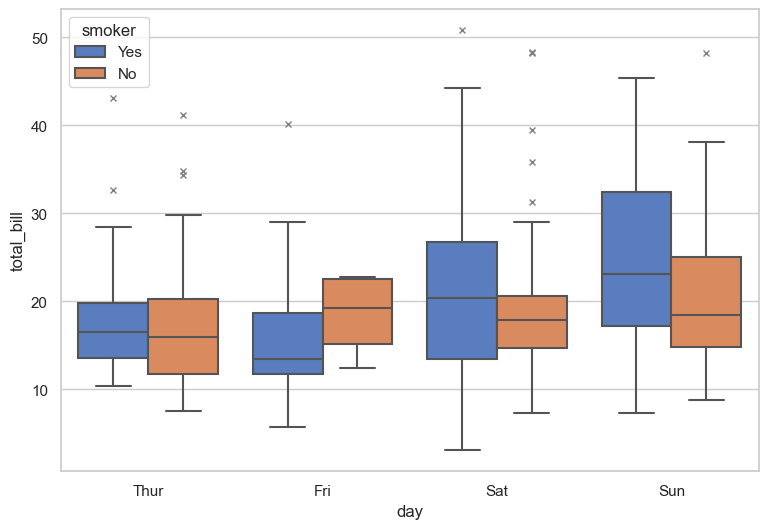

In [6]:
print("--- Customizing Axes-level Plots ---")

# Create figure and axes using Matplotlib
fig, ax = plt.subplots(figsize=(9, 6))

# Create a Seaborn plot on the specific axes
sns.boxplot(data=tips, x="day", y="total_bill", hue="smoker", ax=ax,
            linewidth=1.5, # Seaborn parameter for line width
            flierprops={"marker": "x", "markersize": 4, "markeredgecolor": "gray"}) # Customize fliers (outliers)

In [10]:
# Now, customize using Matplotlib Axes methods on 'ax'
ax.set_title('Distribution of Total Bill by Day and Smoker', fontsize=16, pad=15)
ax.set_xlabel('Day of the Week', fontsize=12, labelpad=10)
ax.set_ylabel('Total Bill ($)', fontsize=12)

# Customize ticks
ax.tick_params(axis='x', rotation=10, labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Add horizontal lines or text
ax.axhline(y=tips['total_bill'].median(), color='red', linestyle='--', linewidth=1, label=f'Median Bill (${tips["total_bill"].median():.2f})')
ax.text(0.02, 0.95, 'Data from Tips Dataset', transform=ax.transAxes, fontsize=9, style='italic', color='gray') # Text relative to axes

# Customize the legend generated by Seaborn
legend = ax.get_legend()
legend.set_title('Smoker Status')
plt.setp(legend.get_texts(), fontsize='10') # Set legend text size
plt.setp(legend.get_title(), fontsize='11')
# Move legend slightly
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) # Alternative way to move legend

# Adjust grid lines
ax.grid(axis='y', linestyle=':', alpha=0.7)
ax.grid(axis='x', linestyle='', alpha=0) # Turn off x grid lines

plt.tight_layout() # Adjust layout before saving/showing
print("Customized Axes-level plot (boxplot).")

Customized Axes-level plot (boxplot).


<Figure size 640x480 with 0 Axes>

In [11]:
# Now, customize using Matplotlib Axes methods on 'ax'
ax.set_title('Distribution of Total Bill by Day and Smoker', fontsize=16, pad=15)
ax.set_xlabel('Day of the Week', fontsize=12, labelpad=10)
ax.set_ylabel('Total Bill ($)', fontsize=12)

# Customize ticks
ax.tick_params(axis='x', rotation=10, labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Add horizontal lines or text
ax.axhline(y=tips['total_bill'].median(), color='red', linestyle='--', linewidth=1, label=f'Median Bill (${tips["total_bill"].median():.2f})')
ax.text(0.02, 0.95, 'Data from Tips Dataset', transform=ax.transAxes, fontsize=9, style='italic', color='gray') # Text relative to axes

# Customize the legend generated by Seaborn
legend = ax.get_legend()
legend.set_title('Smoker Status')
plt.setp(legend.get_texts(), fontsize='10') # Set legend text size
plt.setp(legend.get_title(), fontsize='11')
# Move legend slightly
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) # Alternative way to move legend

# Adjust grid lines
ax.grid(axis='y', linestyle=':', alpha=0.7)
ax.grid(axis='x', linestyle='', alpha=0) # Turn off x grid lines

plt.tight_layout() # Adjust layout before saving/showing
print("Customized Axes-level plot (boxplot).")

Customized Axes-level plot (boxplot).


<Figure size 640x480 with 0 Axes>

#### 2. Saving the Plot
- Use fig.savefig() or plt.savefig() as shown in the Matplotlib section.
- It's crucial to do this *before* plt.show().

In [14]:
output_dir = 'seaborn_plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
save_path = os.path.join(output_dir, 'custom_seaborn_boxplot.png')

fig.savefig(save_path, dpi=150, bbox_inches='tight')
print(f"\nSaved customized plot to: '{save_path}'")


Saved customized plot to: 'seaborn_plots\custom_seaborn_boxplot.png'


#### 3. Customizing Figure-level Plots
- Figure-level functions (e.g., relplot, displot, catplot, pairplot, jointplot)
- return a grid object (FacetGrid, PairGrid, JointGrid).
- You access the underlying Figure and Axes through this object.


--- Customizing Figure-level Plots ---

Saved customized figure-level plot to: 'seaborn_plots\custom_seaborn_relplot.png'


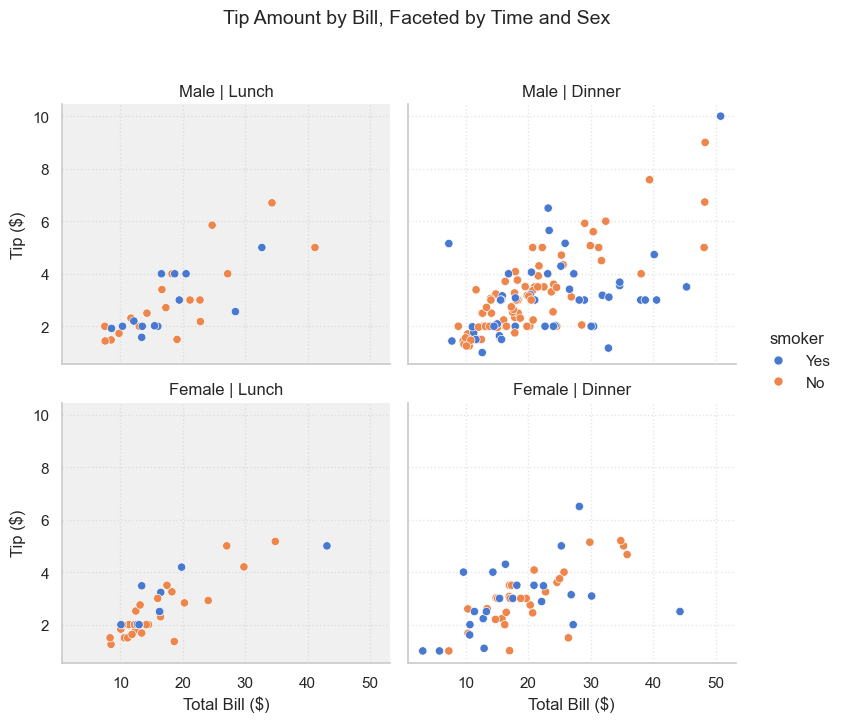


--- Customization & Integration complete ---


In [15]:
print("\n--- Customizing Figure-level Plots ---")

# Create a figure-level plot (returns a FacetGrid object)
g = sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    col="time", row="sex", hue="smoker",
    kind="scatter", # Specify the underlying plot kind
    height=3.5, aspect=1.1
)

# Access the underlying Figure and Axes
# g.fig -> the Matplotlib Figure
# g.axes -> a NumPy array of the Axes objects in the grid
# g.ax -> the single Axes if it's not faceted (like jointplot main panel)

# Customize using the FacetGrid object methods
g.set_axis_labels("Total Bill ($)", "Tip ($)")
g.set_titles(col_template="{col_name}", row_template="{row_name}") # Simpler titles
g.fig.suptitle('Tip Amount by Bill, Faceted by Time and Sex', y=1.03, fontsize=14)
g.tight_layout() # Adjust layout

# Further customization via iterating through axes
for i, ax in enumerate(g.axes.flat): # Iterate through all axes in the grid
    ax.grid(True, linestyle=':', alpha=0.5)
    if i % 2 == 0: # Example: Add background color to left column
       ax.set_facecolor('#f0f0f0')

# Save the figure-level plot
save_path_facet = os.path.join(output_dir, 'custom_seaborn_relplot.png')
g.savefig(save_path_facet, dpi=150) # Can call savefig directly on the grid object too
print(f"\nSaved customized figure-level plot to: '{save_path_facet}'")


# --- Display Plots (Optional after saving) ---
plt.show() # Show both plots generated
print("\n--- Customization & Integration complete ---")

# Clean up plot windows if necessary
plt.close('all')